# Place the your data file in the same folder as this notebook and run the cells to use pyFish on your data
> ### Note : Make sure your data file is save in the right format as follows:
    -- Must not have nore than 3 columns
    -- Must be either a csv or txt file
    -- If your data file is a csv type, be the delimiter is a `,' (comma), if not you change the delimiter accordingly in `Load data` section
    -- (preferable) named as `data.csv`, if not be sure to change it in `Load data` section.
#### Note: Its recommended to install pyFish in different (python/anaconda) environment, see installation guide for more help.

# Import libaries

In [1]:
import pandas as pd

### Import pyFish

In [4]:
# Uncomment below two lines if executing without installation (not recommended)
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [3]:
import pyddsde
pyddsde.__version__

ZMQInteractiveShell


'1.0.0'

# Load data
> ### This will load the data
    -- Place your data file in the same directory as this notebook is in.
    -- Either rename your data file as `data.csv` or give the proper file name below 
    -- Change the delimiter, in case, you have a csv file with delimiter other that `,`.
    -- Timestamps (if any) must be either in the first column or last.
    -- Data columns must have only float

In [5]:
# Change this according to your data file name
file_name = 'sim_data_scalar_ternary.csv'
delimiter = ','
df = pd.read_csv(file_name, delimiter=delimiter, names=['a', 'b', 'c'])
#This removes the columns additional columns
for col in df.columns:
    if df[col].isnull().all():
        df = df.drop([col], axis=1)
rows, cols = df.shape
print('We found {} rows and {} columns'.format(rows, cols))

We found 100001 rows and 2 columns


### What do these columns' represent?
    -- Columns either show the time stamp data or SDE time series.
    -- We need to know if the column is time stamp of sde time series data
    -- edit the below according to your data

### If your data has three columns with the first two columns being the SDE parameter in x and y, respectively and the 3rd column haveing time stamps, then 
> #### df.columns = ['time','M_x', 'M_y']

### data with 2 columns but no time stamp
> #### df.columns = ['M_x', 'M_y']

> #### df.columns = ['time', 'M']

In [6]:
# In this example the first column is time stamp and the second is SDE data.
df.columns = ['time', 'M']
df.head()

time     M
0  0.09084  0.32
1  1.00120  0.28
2  2.01800  0.40
3  3.00620  0.16
4  4.04070  0.32

In [7]:
# Now convert data to numpy array
t = df['time'].to_numpy()
M = df['M'].to_numpy()

# Analyse using pyFish

Generating Slider data: 100%|██████████| 8/8 [00:00<00:00, 46.16it/s]


| Data Type (vector)   :      False     | Autocorrelation Time :       85       |
| Gaussian Noise       :      True      | M range              :   (-1.0, 1.0)  |
| M mean               :      0.05      | |M| mean             :      0.74      |

Dt = 9
dt= 1


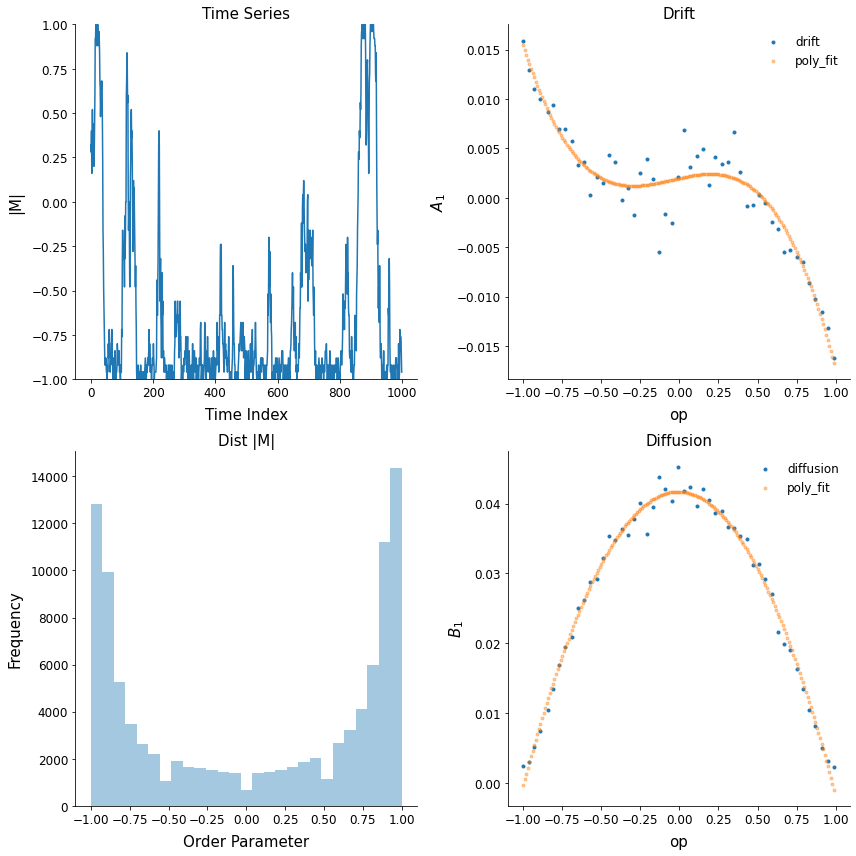

In [8]:
ddsde = pyddsde.Characterize(data=[M], t=t)

## Show Time series

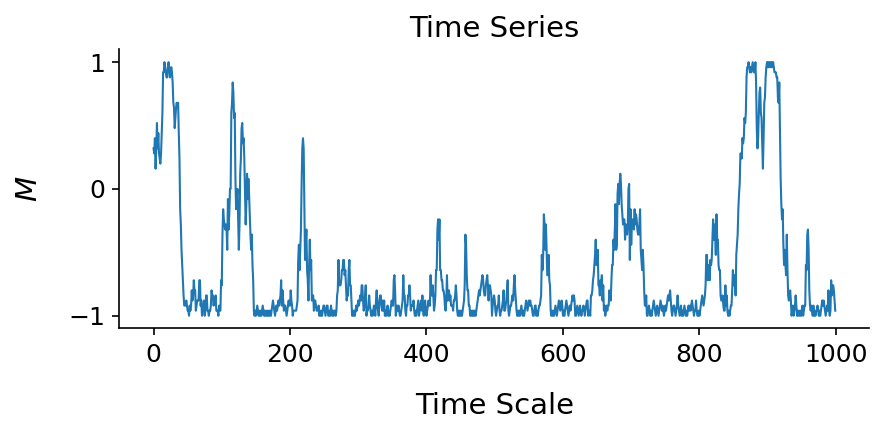

In [9]:
fig_timeseries = ddsde.timeseries()
fig_timeseries.show()

## Show Histograms

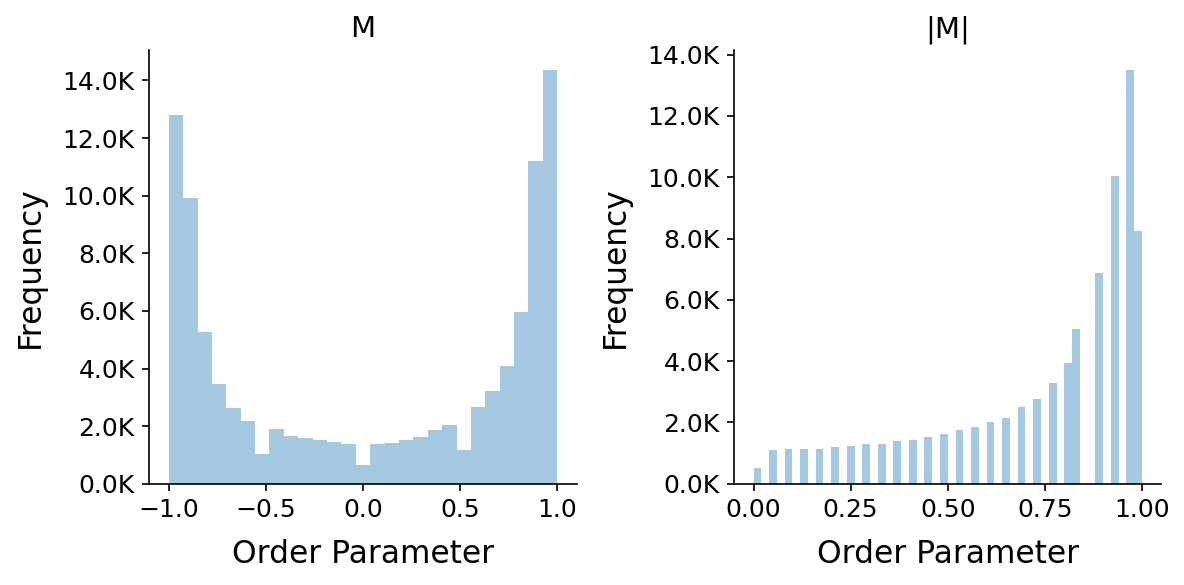

In [10]:
fig_histogram = ddsde.histogram()
fig_histogram.show()

## Drift slider
### Note:
    -- If the sliders are not being displayed below, then prehaps you need to configure your notebook
    -- refer: https://plotly.com/python/getting-started/

In [11]:
ddsde.drift()

In [12]:
ddsde.diffusion()

# Get plots for a time scale


23 not in list:
[1, 25, 49, 74, 98, 123, 147, 172]
Choosing 25; (closest matching timescale from the avaiable ones)


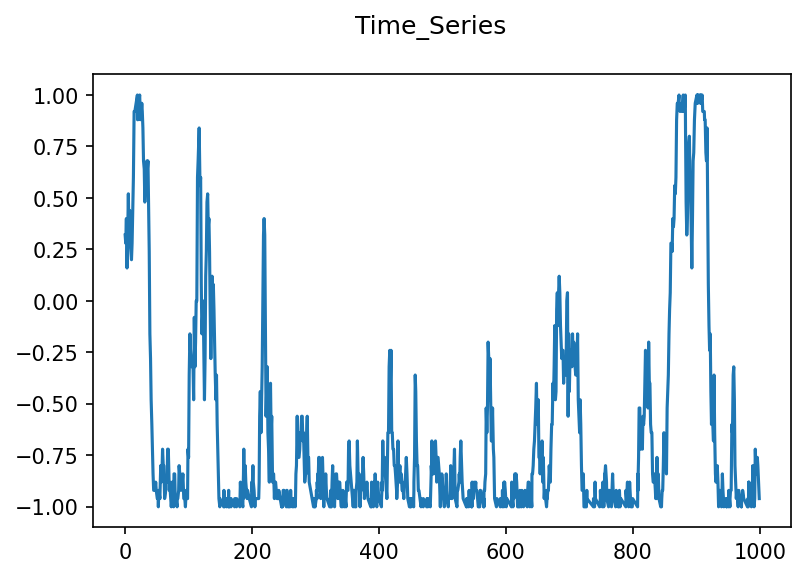

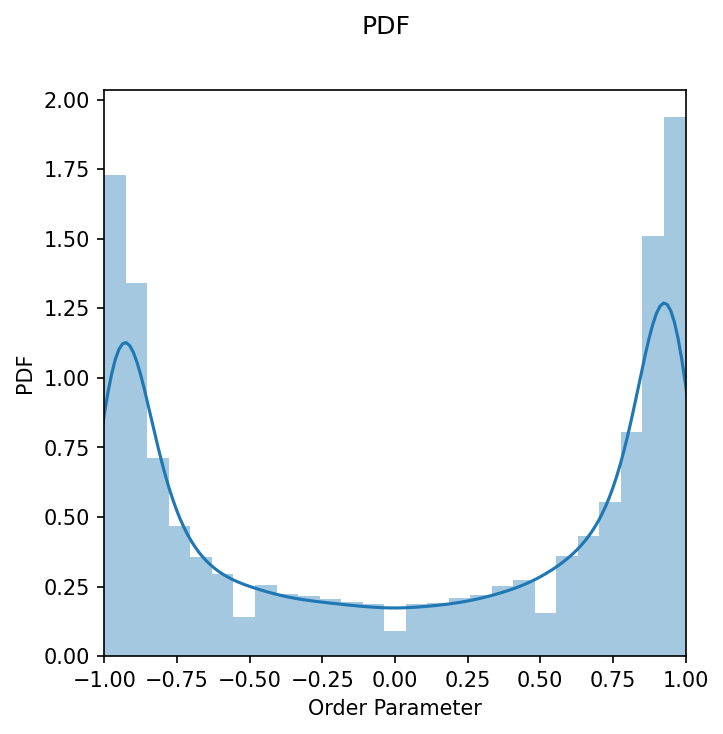

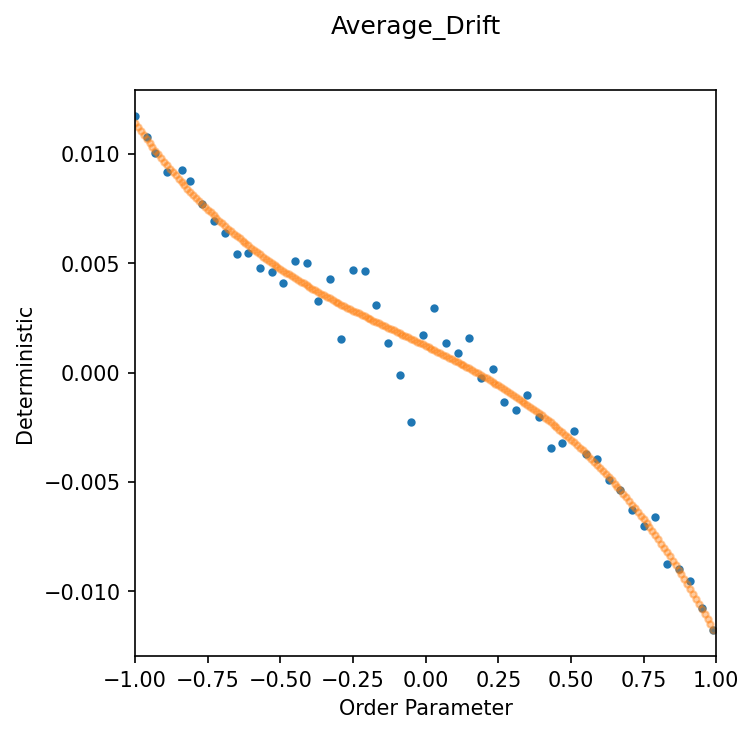

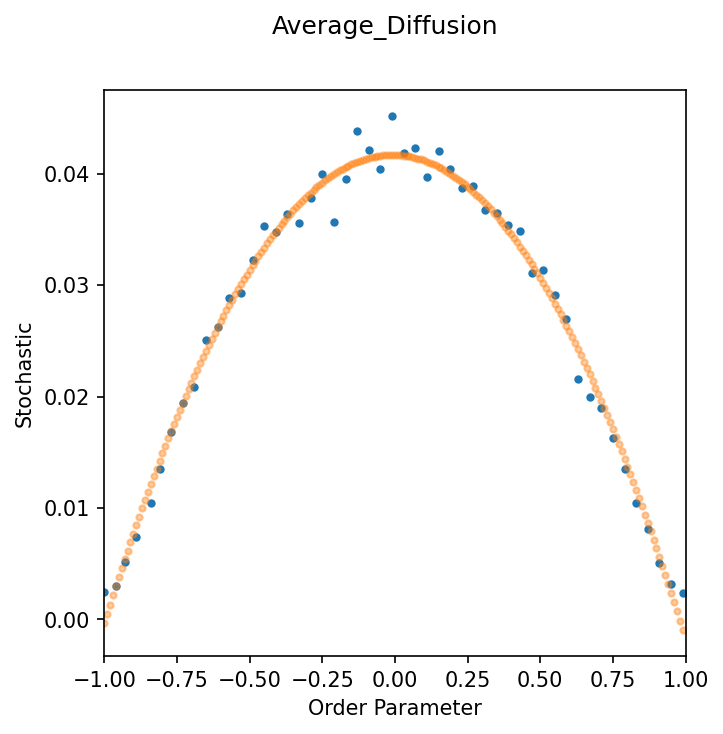

In [13]:
ddsde.visualize(drift_time_scale=23)

# Noise Characterstics Plots

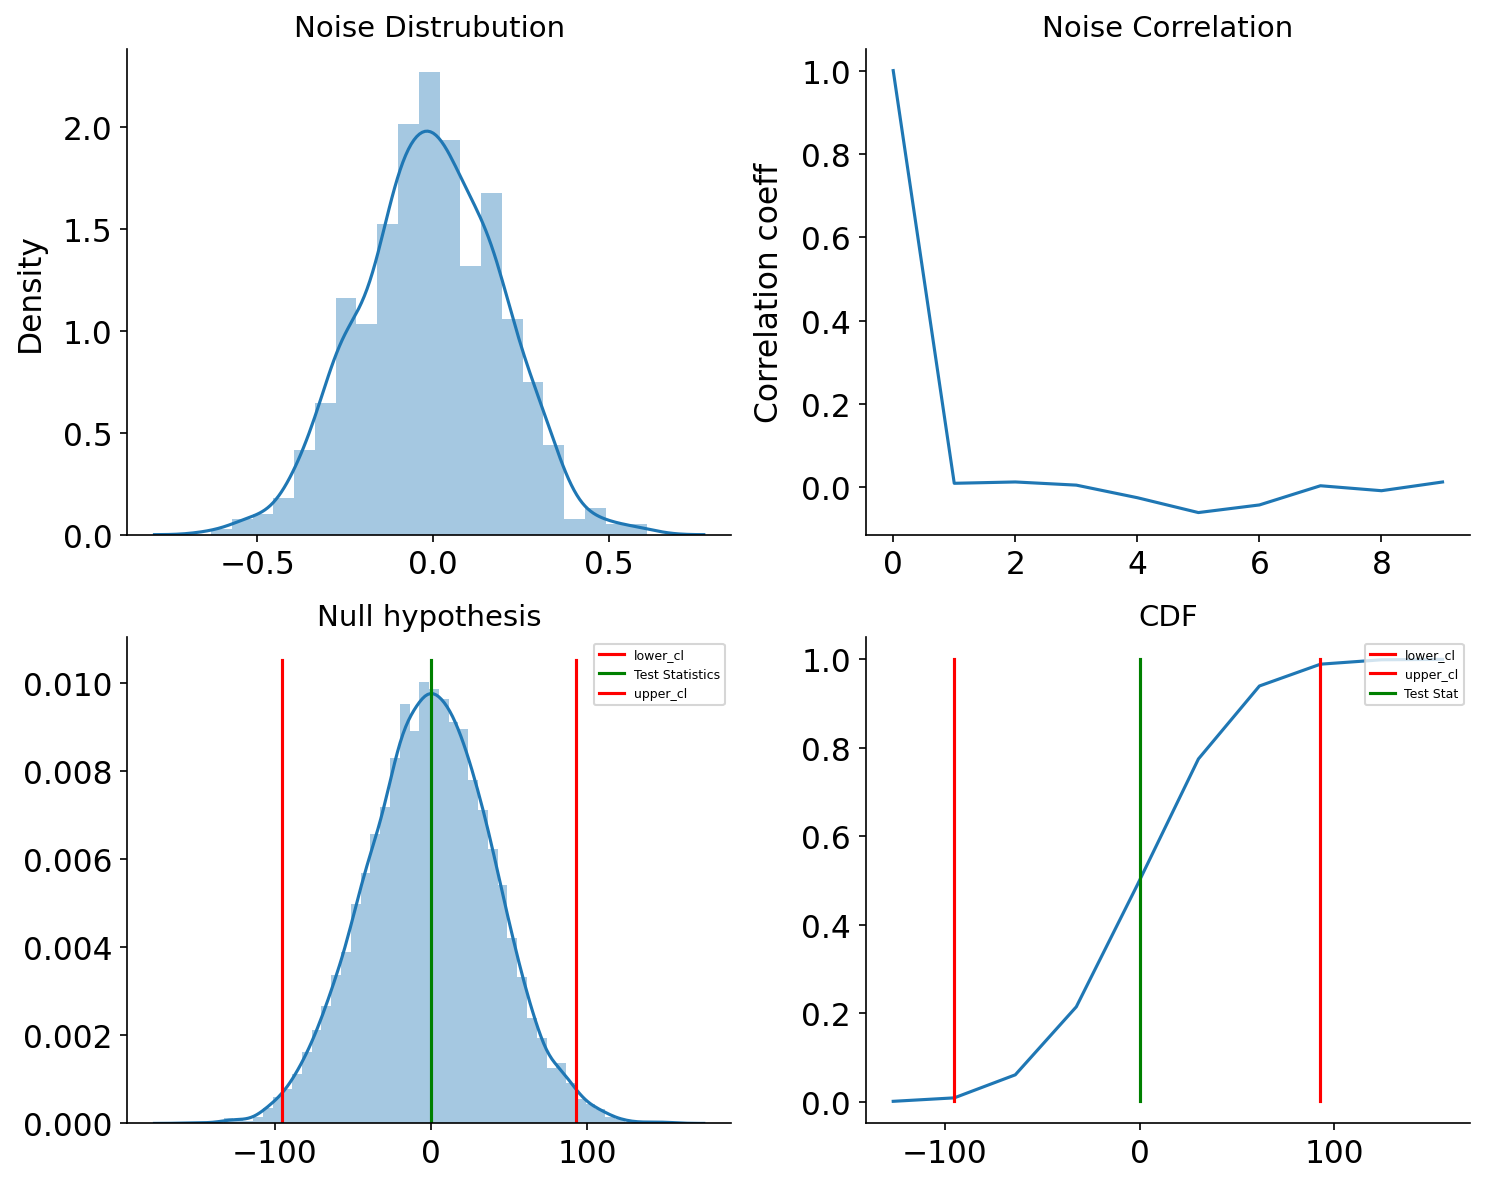

In [14]:
ddsde.noise_characterstics()

# Export Data

In [16]:
ddsde.export_data(save_mat=True, zip=True)

'Exported to /home/ashwin/Documents/Schooling_Fish/package/git_hub/pyFish/notebooks/results/2021-03-12 03-47-06'

# Diagnostics Plots

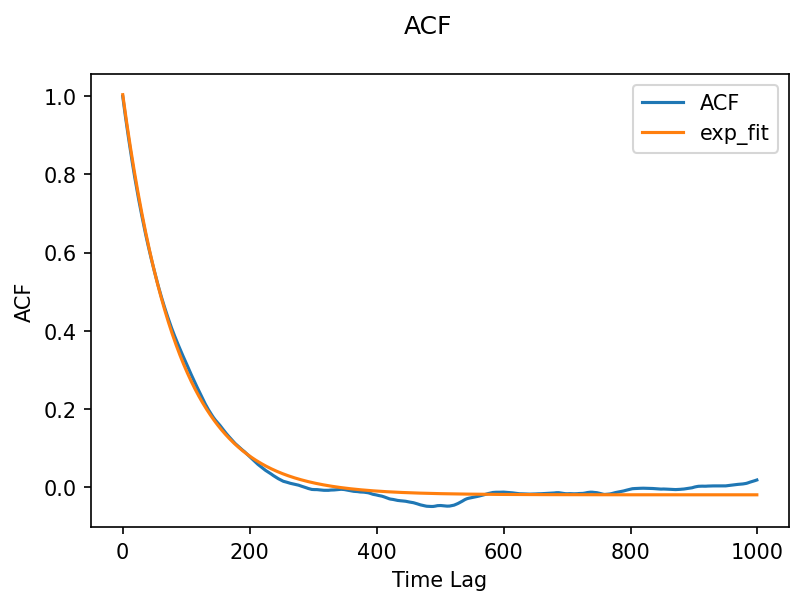

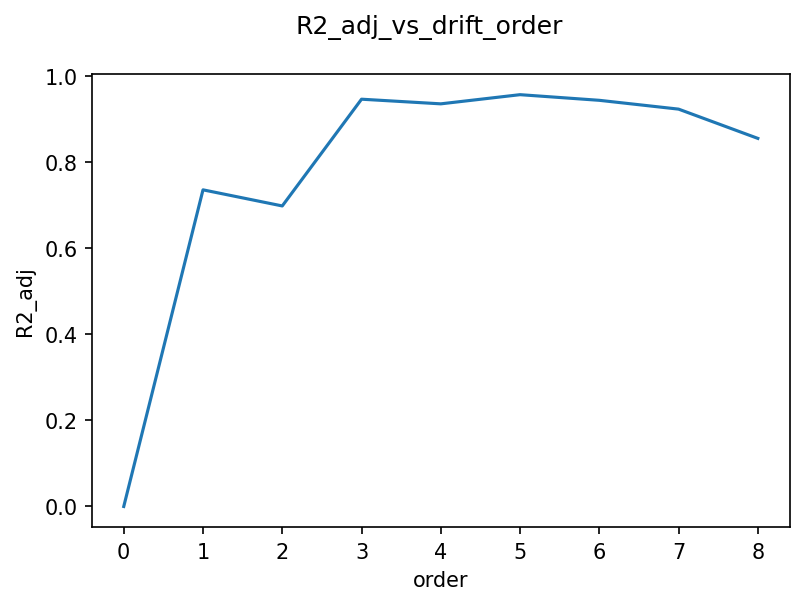

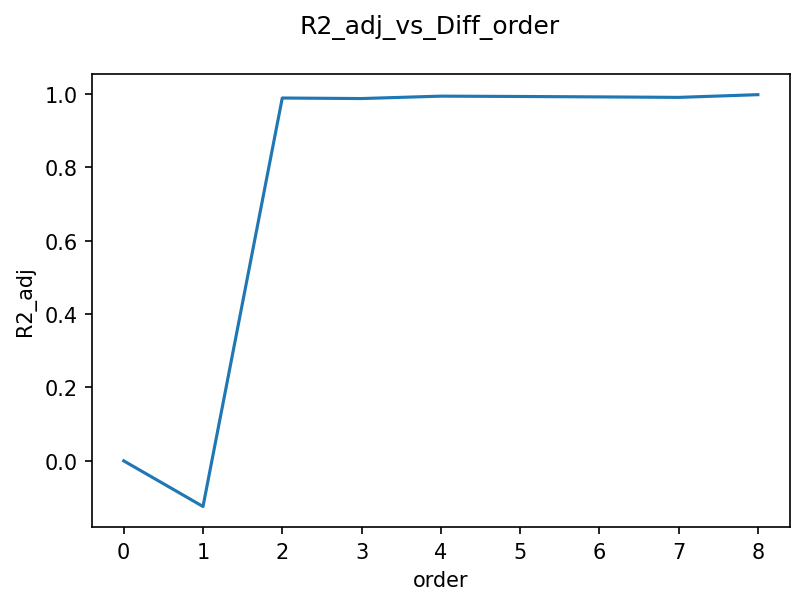

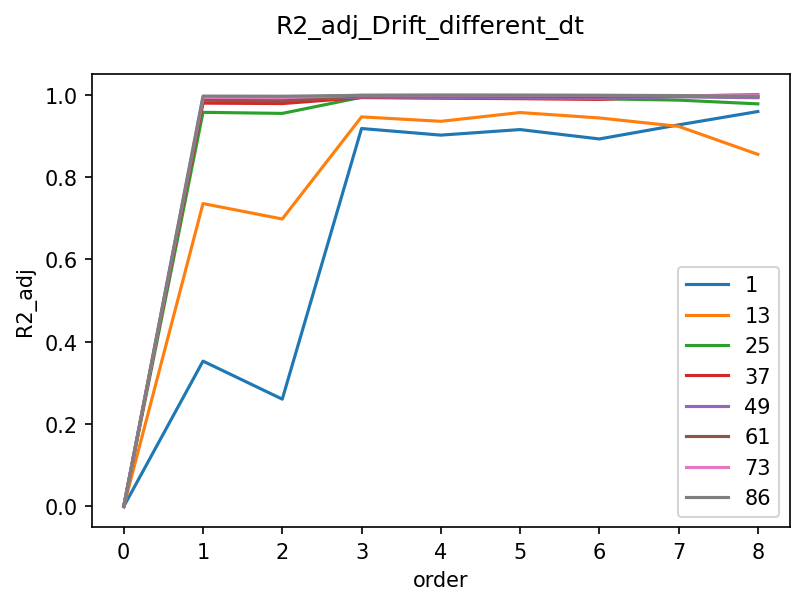

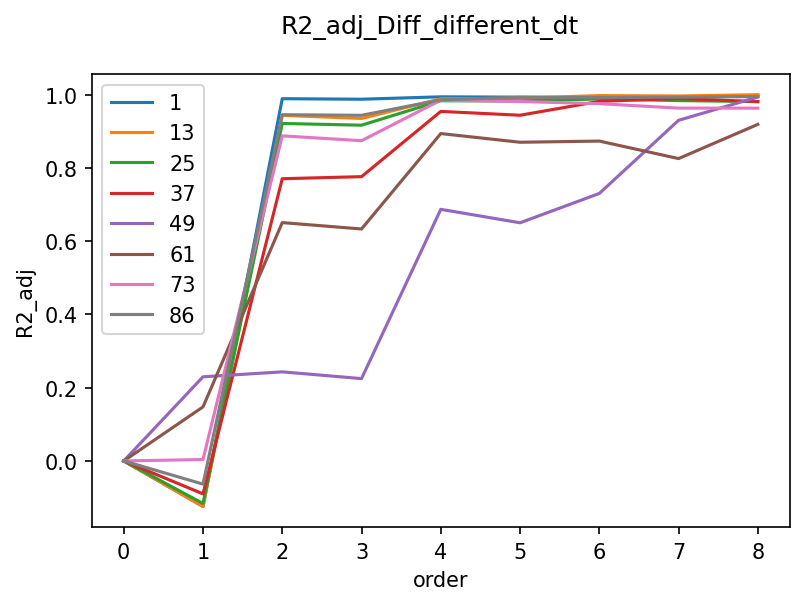

In [17]:
ddsde.diagnostic()